In [19]:
from binance.client import Client
import numpy as np
import pandas as pd
import time
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [20]:
#retrieve api key from text file
a = open("api_key.txt","r")
api_key = a.read().strip()

#retrieve api secret key from text file
b = open("api_secret.txt","r")
api_secret = b.read().strip()

a.close()
b.close()

#Launching Binance API client
client = Client(api_key, api_secret)
print("Logged in")

Logged in


In [21]:
print("How many market checks would you like completed ( per round of testing )")
total_checks = int(input())

print("How much time would you like between each market check ( in seconds please )?")
time_between_checks = int(input())

print("How many rounds of testing would you like to do?")
total_rounds = int(input())

print("I estimate this program will run for ", (total_checks * time_between_checks * total_rounds*2), " seconds.")

How many market checks would you like completed ( per round of testing )
3
How much time would you like between each market check ( in seconds please )?
3
How many rounds of testing would you like to do?
5
I estimate this program will run for  90  seconds.


In [22]:
#Lists
data_symb = [] #Symbols
data_inv = [] #Investments
data_pc = [] #Percentage Change

#Creating a batch variable to keep track of what 'batch' we are on for testing purposes
batch = 0

In [23]:
while (batch < total_rounds):    
    
    #Gets every 24h ticker data point
    tickers = client.get_ticker()

    #cols are the names of the dataframe's columns
    cols = ["Symbol", "Current Price", "Volume", "24hr %Change", "High Price", "Low Price"]

    #creating a dataframe 'df' to store all our numbers
    df_assets = pd.DataFrame(columns = cols)

    #enumerating variable 'en'
    en = 0

    for ticker in tickers:
        df_assets.loc[en] = [ticker['symbol'],float(ticker['askPrice']), float(ticker['volume']),
                            float(ticker['priceChangePercent']), float(ticker['highPrice']), float(ticker['lowPrice'])]
        en = en+1
    
    #Now I want to track the momentum of each trading asset
    #Going to create a Dataframe for that
    df_momentum = pd.DataFrame(data = df_assets['Symbol'], columns = ['Symbol'])


    current_check = 0 #Enumeration variable
    momentum_values_list = [] #list to keep track of momentum values

    #Creating a loop to mimic time and collect data as time passes
    while(current_check < total_checks):

        tickers = client.get_ticker() #Gets current ticker information
        temp = [] #List to keep track of momentum values for the current iteration market check

        for ticker in tickers:
            temp.append(float(ticker['askPrice']))


        momentum_values_list.append(temp) #Appending temp to our momentum_values_list    
        current_check = current_check + 1 #Enumerating current_check to eventually meet total_checks value
        time.sleep(time_between_checks) #Resting for designated time

    print("Initial Market Check for Batch #",batch," is complete.")


    #Now I want to add our market data gathered from 'momentum_values_list' to our momentum dataframe 'df_momentum'
    for i in range(total_checks):
        df_momentum.insert(i+1,i+1,momentum_values_list[i])

    #Setting up DataFrames
    perc_change = ((df_momentum[total_checks] - df_momentum[1])/df_momentum[1])
    df_momentum.insert(df_momentum.shape[1], "Percentage Change", perc_change)
    df_pos_momentum = df_momentum[df_momentum['Percentage Change'] > 0]
    
    #Filtering Dataframe
    strat_df = df_pos_momentum[df_pos_momentum['Percentage Change'] >= df_pos_momentum['Percentage Change'].quantile(.98)]
    
    #Calculating Individual Investments
    total_investment = 10000
    strat_df_invs = ((strat_df['Percentage Change']/strat_df['Percentage Change'].sum())*total_investment)
    
    #Appending Investments to Dataframe
    strat_df.insert(strat_df.shape[1], "Investments", strat_df_invs)
    
    
    #HERE IS WHERE YOU WOULD ACTUALLY PURCHASE USING BINANCE API
    #HERE IS WHERE YOU WOULD ACTUALLY PURCHASE USING BINANCE API
    #HERE IS WHERE YOU WOULD ACTUALLY PURCHASE USING BINANCE API
  
    
    #Gathering Restult Data for Evaluation
    print("Now Sleeping for Designated Time")
    time.sleep(total_checks * time_between_checks) #resting for the passage of time and assets to appreciate in value

    symbols_strat_df = strat_df['Symbol'].values #list of symbols in the positive momentum dataframe
    new_prices = [None] * len(symbols_strat_df) #List for prices of post-trade (for evaluation purposes)

    tickers = client.get_ticker() #gets most up to date info
    i = 0 #Enumeration variable

    for ticker in tickers:
     
        if (i == len(symbols_strat_df)):
            break
        if ((ticker['symbol'] == symbols_strat_df[i])):
            new_prices[i] = float(ticker['askPrice'])
            i = i + 1
            
    #Appending Result Data to DataFrame
    strat_df.insert(strat_df.shape[1], "Updated Prices", new_prices)
    
    #Calculating % Change in Value
    strat_df_civ = (strat_df['Updated Prices'] - strat_df[total_checks])/strat_df[total_checks]
    
    #Appending Change in Investment Value to Dataframe
    strat_df.insert(strat_df.shape[1], "Change in Investment Value", strat_df_civ)
    
    #Storing our results
    data_symb.append(strat_df['Symbol'])
    data_inv.append(strat_df['Investments'])
    data_pc.append(strat_df['Change in Investment Value'])

    #Getting current time for documentation purposes
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")

    print("Batch #", batch, "is complete. It is currently ", current_time,".\n")

    batch = batch + 1 #Enumerating batch variable

Initial Market Check for Batch # 0  is complete.
Now Sleeping for Designated Time
Batch # 0 is complete. It is currently  17:28:27 .

Initial Market Check for Batch # 1  is complete.
Now Sleeping for Designated Time
Batch # 1 is complete. It is currently  17:28:51 .

Initial Market Check for Batch # 2  is complete.
Now Sleeping for Designated Time
Batch # 2 is complete. It is currently  17:29:15 .

Initial Market Check for Batch # 3  is complete.
Now Sleeping for Designated Time
Batch # 3 is complete. It is currently  17:29:37 .

Initial Market Check for Batch # 4  is complete.
Now Sleeping for Designated Time
Batch # 4 is complete. It is currently  17:30:00 .



<h1> Analysis </h1>

<h3> Percentage Change Returns </h3>

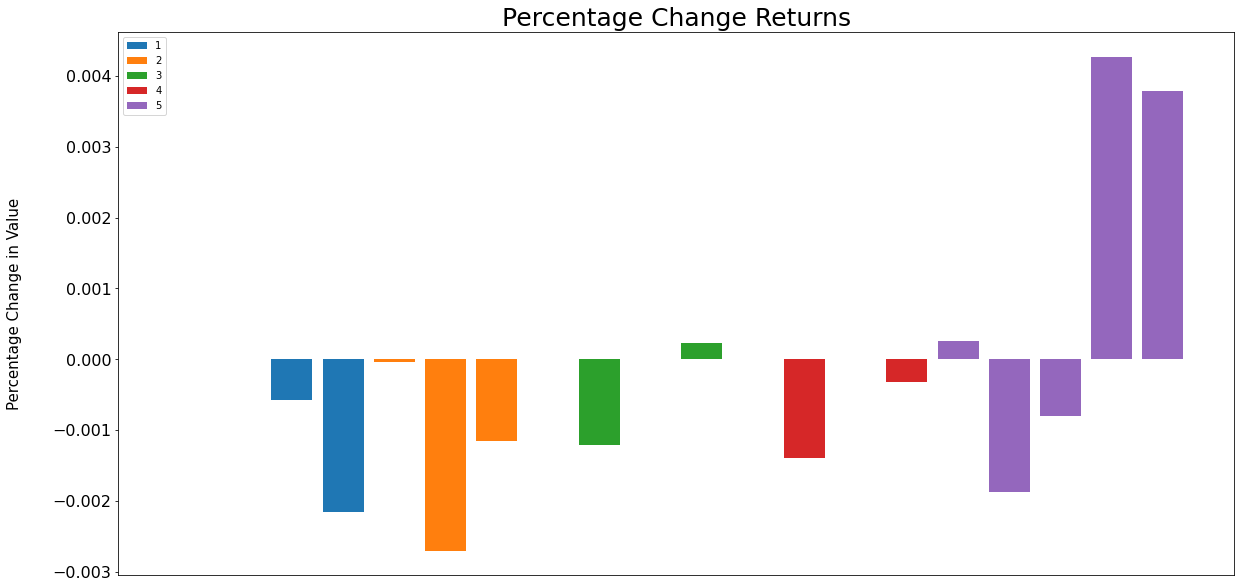

In [48]:
fig = plt.figure(figsize=(20, 10))
plt.bar(data_symb[0],data_pc[0])
plt.bar(data_symb[1],data_pc[1])
plt.bar(data_symb[2],data_pc[2])
plt.bar(data_symb[3],data_pc[3])
plt.bar(data_symb[4],data_pc[4])
plt.title("Percentage Change Returns", fontsize= 25)
plt.ylabel("Percentage Change in Value", fontsize= 15, labelpad = 30)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.yticks(fontsize=16)
plt.legend([1,2,3,4,5], loc = 'upper left')

<h3> Nominal Dollar Returns </h3>

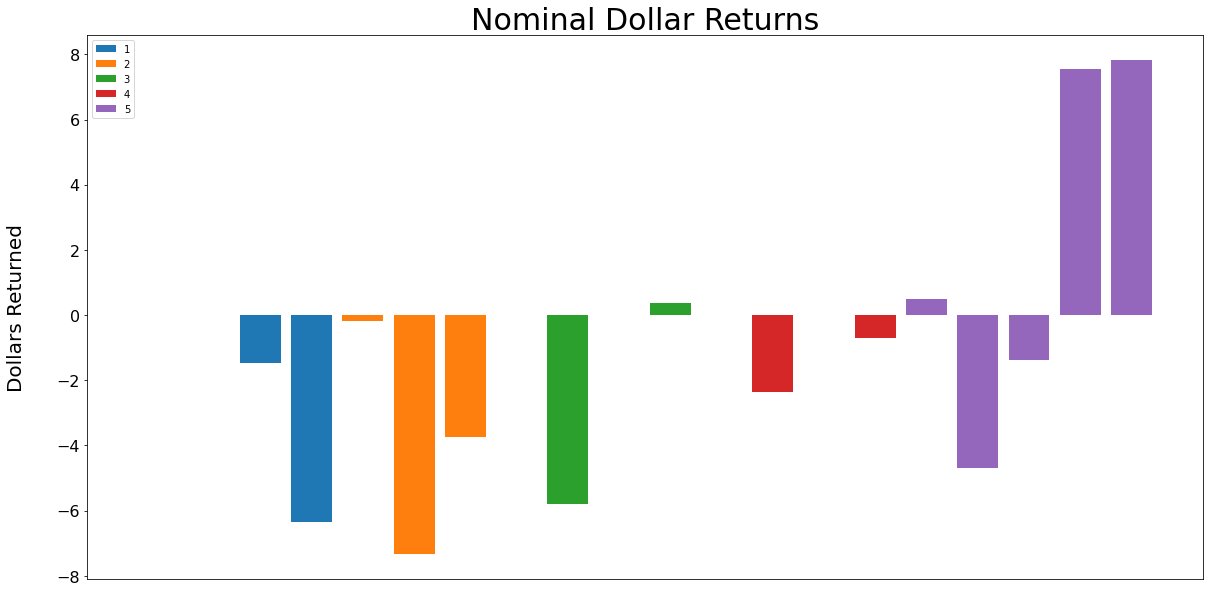

In [63]:
fig = plt.figure(figsize=(20, 10))
plt.bar(data_symb[0],(data_pc[0]*data_inv[0]))
plt.bar(data_symb[1],(data_pc[1]*data_inv[1]))
plt.bar(data_symb[2],(data_pc[2]*data_inv[2]))
plt.bar(data_symb[3],(data_pc[3]*data_inv[3]))
plt.bar(data_symb[4],(data_pc[4]*data_inv[4]))
plt.title("Nominal Dollar Returns", fontsize= 30)
plt.ylabel("Dollars Returned", fontsize= 20, labelpad = 30)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.yticks(fontsize=16)
plt.legend([1,2,3,4,5], loc = 'upper left')